# voting Classifiers

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = make_moons()
x = df[0]
y = df[1]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state = 1234)
print(y_test)
len(x_train)

[1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0]


80

In [3]:
rnd_clf = RandomForestClassifier()
logreg_clf = LogisticRegression()
svm_clf = SVC(probability= True)
vot_clf = VotingClassifier(estimators=[('rf',RandomForestClassifier()),('lr',LogisticRegression()),
                                       ('svc',SVC(probability= True))],voting='soft') #voting ='hard'
#voting = 'soft' has higher performance than 'hard', it gives more weight to highly confident votes.
#in svm algorithm, we should use probability = True for using voing = 'soft'

In [4]:
for clf in (rnd_clf, logreg_clf, svm_clf, vot_clf):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__,':', accuracy_score(y_pred,y_test))
    print(clf.predict_proba(x_test),'\n')
    

RandomForestClassifier : 0.9
[[0.19 0.81]
 [1.   0.  ]
 [0.99 0.01]
 [0.93 0.07]
 [0.46 0.54]
 [0.32 0.68]
 [0.6  0.4 ]
 [0.99 0.01]
 [0.15 0.85]
 [0.69 0.31]
 [1.   0.  ]
 [0.91 0.09]
 [0.99 0.01]
 [0.16 0.84]
 [0.   1.  ]
 [0.02 0.98]
 [0.   1.  ]
 [0.65 0.35]
 [0.   1.  ]
 [0.92 0.08]] 

LogisticRegression : 0.7
[[0.49075232 0.50924768]
 [0.93502133 0.06497867]
 [0.62392656 0.37607344]
 [0.91193957 0.08806043]
 [0.19320731 0.80679269]
 [0.16659019 0.83340981]
 [0.33910033 0.66089967]
 [0.74267209 0.25732791]
 [0.44172877 0.55827123]
 [0.43198551 0.56801449]
 [0.93457032 0.06542968]
 [0.86346039 0.13653961]
 [0.66709775 0.33290225]
 [0.58764435 0.41235565]
 [0.03609238 0.96390762]
 [0.26616809 0.73383191]
 [0.09748603 0.90251397]
 [0.29689254 0.70310746]
 [0.03828589 0.96171411]
 [0.89193153 0.10806847]] 

SVC : 0.95
[[0.01227205 0.98772795]
 [0.97364561 0.02635439]
 [0.98048029 0.01951971]
 [0.97591615 0.02408385]
 [0.56703799 0.43296201]
 [0.42245808 0.57754192]
 [0.91254635 0.0874

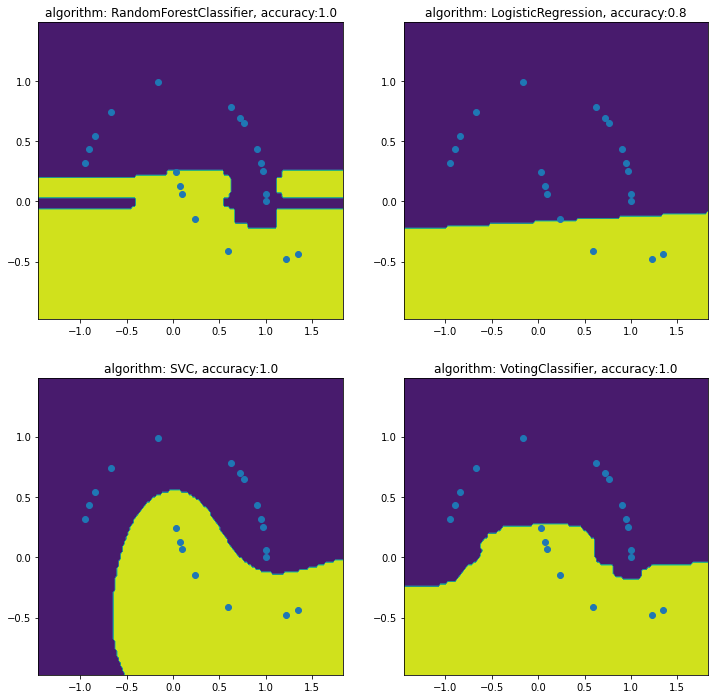

In [5]:
x = x_test
y = y_test
x0_min, x0_max = min(x[:,0]) - 0.5, max(x[:,0]) + 0.5
x1_min, x1_max = min(x[:,1]) - 0.5, max(x[:,1]) + 0.5
xx, yy = np.meshgrid(np.arange(x0_min, x0_max,0.02),np.arange(x1_min, x1_max,0.02))
i = 0
plt.figure(figsize=(12,12))
for clf in (rnd_clf, logreg_clf, svm_clf, vot_clf):
    i += 1
    clf.fit(x,y)
    y_pred = clf.predict(x)
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = z.reshape((xx.shape))
    accuracy = accuracy_score(y,y_pred)
    plt.subplot(2,2,i)
    plt.contourf(xx,yy,Z)
    plt.scatter(x[:,0],x[:,1])
    plt.title('algorithm: {}, accuracy:{}'.format(clf.__class__.__name__,accuracy))
    #plt.title(accuracy)
    

# Bagging and Pasting

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#using DecisionTreeClassifier algorithm without using bagging and pasting method:
tree_clf = DecisionTreeClassifier(random_state= 1234)
tree_clf.fit(x_train, y_train)
y_pred = tree_clf.predict(x_train)


In [22]:
#using bagging method on DecisionTreeClassifier algorithm:
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state = 1234),n_estimators= 80, max_samples= 20, n_jobs= -1,
                            bootstrap= True, oob_score= True)# True:bagging, False = pasting
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_train)

print (bag_clf.oob_score_) #the average pecentage of instance in training sets that they are used in the model.
print (accuracy_score(y_pred, y_train))
print(bag_clf.oob_decision_function_)


0.875
0.9125
[[0.6        0.4       ]
 [0.         1.        ]
 [0.53333333 0.46666667]
 [0.         1.        ]
 [0.14285714 0.85714286]
 [1.         0.        ]
 [0.73770492 0.26229508]
 [0.01515152 0.98484848]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.42424242 0.57575758]
 [0.01538462 0.98461538]
 [0.90163934 0.09836066]
 [0.         1.        ]
 [0.125      0.875     ]
 [0.68333333 0.31666667]
 [0.94827586 0.05172414]
 [0.06451613 0.93548387]
 [0.23728814 0.76271186]
 [0.77419355 0.22580645]
 [0.95       0.05      ]
 [0.29230769 0.70769231]
 [0.984375   0.015625  ]
 [0.02816901 0.97183099]
 [0.015625   0.984375  ]
 [0.9516129  0.0483871 ]
 [0.06349206 0.93650794]
 [0.22727273 0.77272727]
 [0.01724138 0.98275862]
 [0.10606061 0.89393939]
 [0.41176471 0.58823529]
 [0.359375   0.640625  ]
 [0.01639344 0.98360656]
 [1.         0.        ]
 [1.         0.        ]
 [0.17741935 0.82258065]
 [0.27272727 0.72727273]
 [0.         1.        ]
 [0.30645161

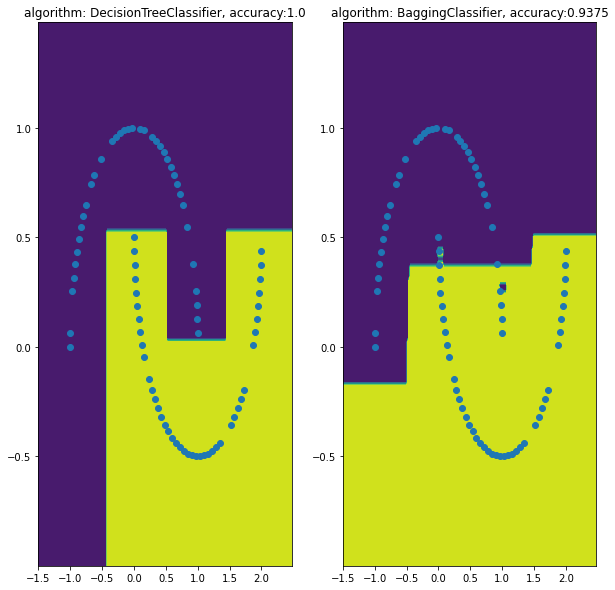

In [16]:
x = x_train
y = y_train
x0_min, x0_max = min(x[:,0]) - 0.5, max(x[:,0]) + 0.5
x1_min, x1_max = min(x[:,1]) - 0.5, max(x[:,1]) + 0.5
xx, yy = np.meshgrid(np.arange(x0_min, x0_max,0.02),np.arange(x1_min, x1_max,0.02))
i = 0
plt.figure(figsize=(10,10))
for clf in (tree_clf, bag_clf):
    i += 1
    clf.fit(x,y)
    y_pred = clf.predict(x)
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = z.reshape((xx.shape))
    accuracy = accuracy_score(y,y_pred)
    plt.subplot(1,2,i)
    plt.contourf(xx,yy,Z)
    plt.scatter(x[:,0],x[:,1])
    plt.title('algorithm: {}, accuracy:{}'.format(clf.__class__.__name__,accuracy))

# Random Forest

In [ ]:
#instead of searching the best features for spliting, it searches for best features among random subset of features.
#it has the hyperparameters of decision tree classifiers and bagging classifiers for conrolling ensemble.

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rnf_clf = RandomForestClassifier(n_estimators= 80, max_leaf_nodes=5, n_jobs= -1)
rnf_clf.fit(x_train, y_train)
y_pred_rnf = rnf_clf.predict(x_test)

# Feature importance

In [8]:
from sklearn.datasets import load_iris

In [9]:
iris = load_iris()
x = iris.data
y = iris.target
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
rnf_clf = RandomForestClassifier(n_estimators= 500, n_jobs= -1)
rnf_clf.fit(x,y)
for (i,j) in zip(iris.feature_names,rnf_clf.feature_importances_):
    print(i,':',j)

sepal length (cm) : 0.09844997716176992
sepal width (cm) : 0.024723743758826203
petal length (cm) : 0.41958567755805287
petal width (cm) : 0.457240601521351


In [14]:
from sklearn.datasets import fetch_openml

In [12]:
mnist = fetch_openml("mnist_784",version = 1)

In [15]:
X = mnist.data
Y = mnist.target

In [16]:
rnf_clf.fit(X, Y)
for (i,j) in zip(mnist.feature_names,rnf_clf.feature_importances_):
    print(i,':',j)

KeyboardInterrupt: 

In [13]:
feature_selection = rnf_clf.feature_importances_.reshape((28,28)) #reshape
plt.figure(figsize= (10,10))
plt.matshow(feature_selection)            #showing the importance of features by matshow

ValueError: cannot reshape array of size 4 into shape (28,28)

# Adaboost Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


In [55]:
x = make_moons()[0]
y = make_moons()[1]

In [57]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1),n_estimators= 200,
                             algorithm= 'SAMME.R', learning_rate= 0.5)
ada_clf.fit(x,y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

Text(0.5, 1.0, 'algorithm: AdaBoostClassifier, accuracy:0.88')

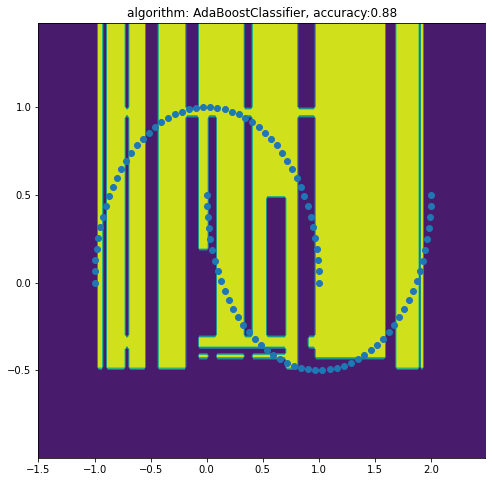

In [59]:
x0_min, x0_max = min(x[:,0]) - 0.5, max(x[:,0]) + 0.5
x1_min, x1_max = min(x[:,1]) - 0.5, max(x[:,1]) + 0.5
xx, yy = np.meshgrid(np.arange(x0_min, x0_max,0.02),np.arange(x1_min, x1_max,0.02))

plt.figure(figsize=(8,8))
y_pred = ada_clf.predict(x)
z = ada_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape((xx.shape))
accuracy = accuracy_score(y,y_pred)
plt.contourf(xx,yy,Z)
plt.scatter(x[:,0],x[:,1])
plt.title('algorithm: {}, accuracy:{}'.format(ada_clf.__class__.__name__,accuracy))


# Gradient Boosting

In [115]:
#from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [21]:
x = np.random.randn(1000)
X = np.array(x).reshape((-1,1))

y = np.power(x,2) +3


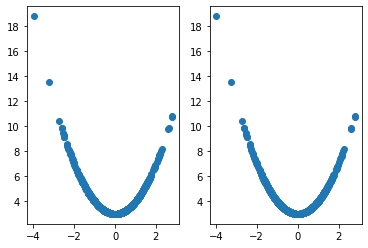

In [22]:
plt.subplot(1,2,1)
plt.scatter(x,y)
plt.subplot(1,2,2)
plt.scatter(X,y)

In [174]:
tree_reg1 = DecisionTreeRegressor(max_depth= 2)
tree_reg1.fit(X, y)
y_pred2 = tree_reg1.predict(X)
y2 = y - tree_reg1.predict(X)
len(y2)
len(X)

1000

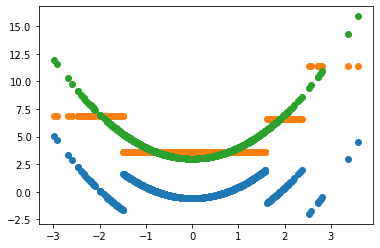

In [175]:
plt.scatter(X,y2)
plt.scatter(X,y_pred2)
plt.scatter(X,y)


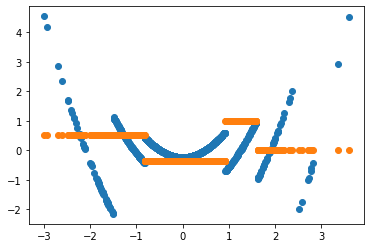

In [176]:
tree_reg2 = DecisionTreeRegressor(max_depth= 2)
tree_reg2.fit(X,y2)
y_ped3 = tree_reg2.predict(X)
y3 = y2 - tree_reg2.predict(X)
plt.scatter(X,y3)
plt.scatter(X,y_ped3)

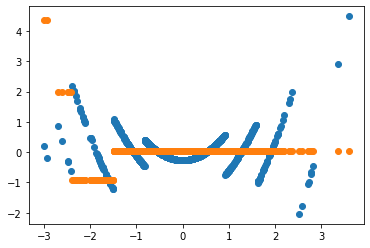

In [177]:
tree_reg3 = DecisionTreeRegressor(max_depth= 2)
tree_reg3.fit(X,y3)
y_pred4 = tree_reg3.predict(X)
y4 = y3 - tree_reg3.predict(X)
plt.scatter(X,y4)
plt.scatter(X,y_pred4)

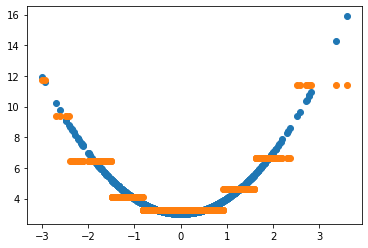

In [178]:
y_pred = sum(tree.predict(X) for tree in (tree_reg1, tree_reg2, tree_reg3))
plt.scatter(X,y)
plt.scatter(X, y_pred)


In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1234)
gbr = GradientBoostingRegressor(max_depth= 2, n_estimators= 120)  #n_estimators : number of trees
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_train)

In [24]:
#finding min error of the algorithm in different trees:
error = [mean_squared_error(y_pred,y_test) for y_pred in gbr.staged_predict(x_test)]
print('position of minimum value in the list:' ,error.index(np.min(error))+1)
np.min(error)
for (i,j) in enumerate(error):
    print(i,j)

position of minimum value in the list: 119
0 1.1995047817299571
1 1.0542260767041205
2 0.9025615409167277
3 0.7848169633197486
4 0.7044395371484973
5 0.612862461170953
6 0.528402083994171
7 0.47759088546881584
8 0.4200163056739889
9 0.3798322551041555
10 0.3251876103114382
11 0.28534850046154725
12 0.2600065835839378
13 0.22757406647994052
14 0.20461284211271363
15 0.18192938372399073
16 0.1670678089305248
17 0.14696244545773843
18 0.1341457506282812
19 0.11613872904346127
20 0.09859685040142122
21 0.08975413936643331
22 0.08198265553764818
23 0.07236875125451221
24 0.06300451222397901
25 0.05803893527859984
26 0.052078042976884446
27 0.04743082500588919
28 0.04197584118070999
29 0.03972287350257478
30 0.03624416884374849
31 0.03195132628054833
32 0.029426892343092606
33 0.027216840406091024
34 0.023786658743376862
35 0.02214006844332796
36 0.020226146098985143
37 0.018878132858547933
38 0.01766554926772285
39 0.0158750669974746
40 0.01513038432461973
41 0.013828743148586436
42 0.01296

In [25]:
#position of minimum value in a list, first solution:
a = [1,2,4,0,3]
a.index(np.min(a))

3

In [26]:
#position of minimum value in a list, second solution:
best_n_estimator = np.argmin(error)+1

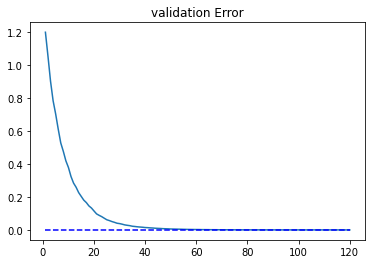

In [27]:
number_trees = np.arange(1,121)
min_error = np.min(error)
min_err = np.ones(120)*min_error
plt.plot(number_trees, error)
plt.title('validation Error')
plt.plot(number_trees, min_err, 'b--')

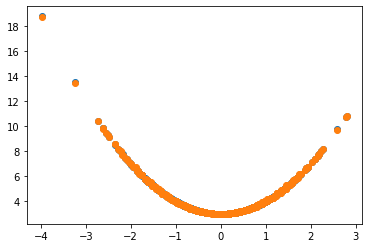

In [28]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, y_pred)

In [29]:
gbr = GradientBoostingRegressor(max_depth= 2, n_estimators= best_n_estimator)  #n_estimators : number of trees
gbr.fit(x_train, y_train)
y_pred2 = gbr.predict(x_test)

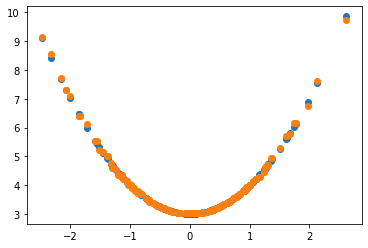

In [30]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred2)

In [287]:
x = np.array([1,2,3,4,5,6,7,8,9,0,6,8,6,4,3,1])
y = np.array([1,1,0,6,4,3,5,6,5,6,1,2,5,6,8,9])+ x
y.shape

(16,)

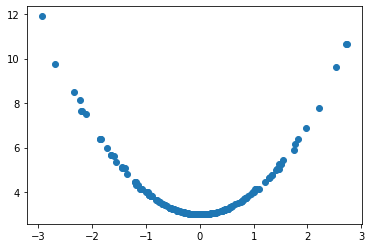

In [293]:
plt.scatter(x_test,y_pred2)

In [50]:
#iris data

In [60]:
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [58]:
iris = load_iris()
x = iris.data 
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.3, random_state = 1234)

In [91]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators= 500)
gbr.fit(x_train,y_train)
error = [mean_squared_error(y_pred,y_test) for y_pred in gbr.staged_predict(x_test)]
print(np.min(error))
best_n_estimator = np.argmin(error)+1
print(best_n_estimator)
dash_line = np.ones(500)*np.min(error)


0.034664753005847385
30


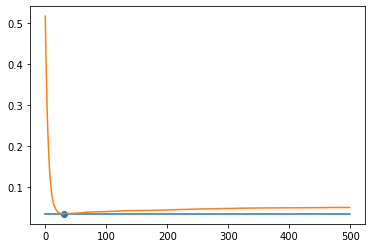

In [92]:
plt.plot(np.arange(0,500),dash_line)
plt.plot(np.arange(0,500),error)
plt.scatter(best_n_estimator,np.min(error))

In [109]:
gbr1 = GradientBoostingRegressor(max_depth=2, n_estimators= best_n_estimator)
gbr1.fit(x_train,y_train)
y_pred1 = gbr1.predict(x_test)
mean_squared_error(y_pred1,y_test)

0.03611755710485269

# Using PCA for reduction dimensionality

In [131]:
x_centered = x - np.mean(x,axis = 0)
U,s,Vt = np.linalg.svd(x_centered)
c1 = Vt.T[:,0]  #first principle component
c2 = Vt.T[:,1]  #second principle component

#creating a dataset with d dimensionality, d<current dimensionality of x:
w2 = Vt.T[:,:2] #principle components with 2-D
new_dataset = x_centered.dot(w2)
new_dataset.shape
x = new_dataset
y = iris.target
print(len(x))
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.3, random_state = 1234)

150


In [128]:
gbr1 = GradientBoostingRegressor(max_depth=2, n_estimators= best_n_estimator)
gbr1.fit(x_train,y_train)
y_pred1 = gbr1.predict(x_test)
mean_squared_error(y_pred1,y_test)

0.03578315555332333

# meshgrid and contourf

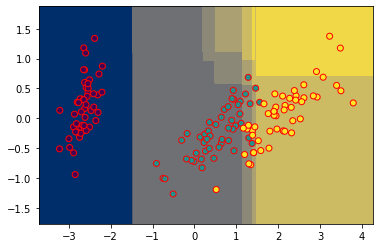

In [137]:
x0_min, x0_max = min(x[:,0])- 0.5, max(x[:,0]) + 0.5
x1_min, x1_max = min(x[:,1])- 0.5, max(x[:,1]) + 0.5
xx, yy = np.meshgrid(np.arange(x0_min, x0_max ,0.02),np.arange(x1_min, x1_max ,0.02))
z = gbr1.predict(np.c_[xx.ravel(),yy.ravel()])
Z = z.reshape((xx.shape))
plt.contourf(xx,yy,Z ,cmap = 'cividis') 
#cmap{tab10,binary,gray,plt.cm.gray,plt.get_cmap('jet'),magma,viridis', 'plasma', 'inferno', 'cividis'} 
# colors = ('c','r','b','m','g'),intensity = 0.5)
plt.scatter(x[:,0],x[:,1],c = y, edgecolors='r',marker = 'o')
